<a href="https://colab.research.google.com/github/rxgxvi15/CODESOFT/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

In [30]:
data_train=pd.read_csv("/content/drive/MyDrive/ML PROJECT/fraudTest.csv")
data_test=pd.read_csv("/content/drive/MyDrive/ML PROJECT/fraudTest.csv")

In [31]:
full_data=pd.concat([data_train, data_test])


In [32]:
full_data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [33]:
full_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1111438 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1111438 non-null  int64  
 1   trans_date_trans_time  1111438 non-null  object 
 2   cc_num                 1111438 non-null  int64  
 3   merchant               1111438 non-null  object 
 4   category               1111438 non-null  object 
 5   amt                    1111438 non-null  float64
 6   first                  1111438 non-null  object 
 7   last                   1111438 non-null  object 
 8   gender                 1111438 non-null  object 
 9   street                 1111438 non-null  object 
 10  city                   1111438 non-null  object 
 11  state                  1111438 non-null  object 
 12  zip                    1111438 non-null  int64  
 13  lat                    1111438 non-null  float64
 14  long                   1

In [34]:
full_data=full_data.dropna()


In [35]:
full_data.isnull().sum()


,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


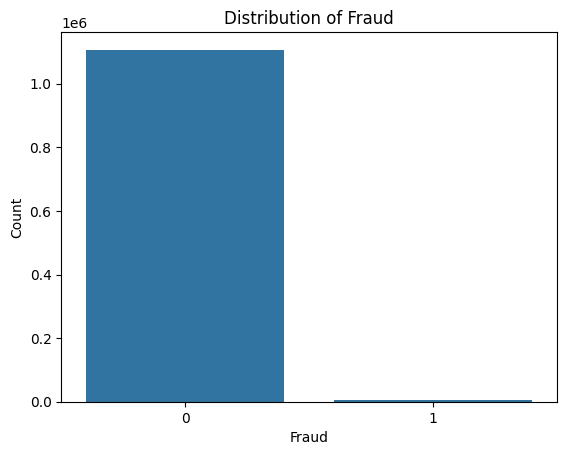

In [36]:
fraud_counts = full_data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

In [37]:
full_data.duplicated().sum()


555719

In [38]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1111438 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1111438 non-null  int64  
 1   trans_date_trans_time  1111438 non-null  object 
 2   cc_num                 1111438 non-null  int64  
 3   merchant               1111438 non-null  object 
 4   category               1111438 non-null  object 
 5   amt                    1111438 non-null  float64
 6   first                  1111438 non-null  object 
 7   last                   1111438 non-null  object 
 8   gender                 1111438 non-null  object 
 9   street                 1111438 non-null  object 
 10  city                   1111438 non-null  object 
 11  state                  1111438 non-null  object 
 12  zip                    1111438 non-null  int64  
 13  lat                    1111438 non-null  float64
 14  long                   1

In [39]:
fraud=full_data[full_data["is_fraud"]==1]
not_fraud=full_data[full_data["is_fraud"]==0]
print(fraud.shape[0])
print(not_fraud.shape[0])

4290
1107148


In [40]:
not_fraud=not_fraud.sample(fraud.shape[0])
data=pd.concat([fraud,not_fraud])

<ipython-input-41-718552f12a2a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['red', 'blue'])


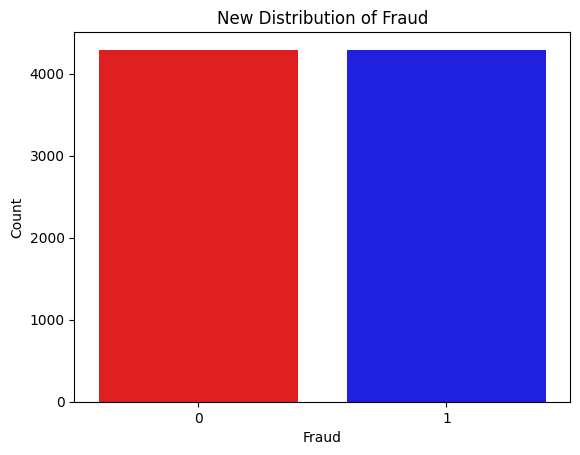

In [41]:
fraud_counts = data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['red', 'blue'])
plt.title('New Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

In [42]:
unused_cols=['Unnamed: 0','first','last','unix_time','street','gender','job','dob','city','state','trans_num','merchant']
data.drop(columns=unused_cols,inplace=True)

In [43]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8580 entries, 1685 to 451828
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  8580 non-null   object 
 1   cc_num                 8580 non-null   int64  
 2   category               8580 non-null   object 
 3   amt                    8580 non-null   float64
 4   zip                    8580 non-null   int64  
 5   lat                    8580 non-null   float64
 6   long                   8580 non-null   float64
 7   city_pop               8580 non-null   int64  
 8   merch_lat              8580 non-null   float64
 9   merch_long             8580 non-null   float64
 10  is_fraud               8580 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 804.4+ KB


In [44]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['trans_day']=data['trans_date_trans_time'].dt.day
data['trans_month']=data['trans_date_trans_time'].dt.month
data['trans_year']=data['trans_date_trans_time'].dt.year
data['trans_hour']=data['trans_date_trans_time'].dt.hour
data['trans_minute']=data['trans_date_trans_time'].dt.minute
data.drop(columns=['trans_date_trans_time'],inplace=True)

In [45]:
encoder=LabelEncoder()
data['category']=encoder.fit_transform(data['category'])
data['cc_num']=encoder.fit_transform(data['cc_num'])

In [46]:
data.head()


,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minute
1685,511,5,24.84,79759,31.8599,-102.7413,23,32.575873,-102.604290,1,21,6,2020,22,6
1767,798,8,780.52,53803,42.5545,-90.3508,1306,42.461127,-91.147148,1,21,6,2020,22,32
1781,798,0,620.33,53803,42.5545,-90.3508,1306,42.771834,-90.158365,1,21,6,2020,22,37
1784,578,11,1077.69,70726,30.4590,-90.9027,71335,31.204974,-90.261595,1,21,6,2020,22,38
1857,511,12,842.65,79759,31.8599,-102.7413,23,31.315782,-102.736390,1,21,6,2020,23,2


In [47]:
scaler=StandardScaler()
data['amt']=scaler.fit_transform(data[['amt']])
data['zip']=scaler.fit_transform(data[['zip']])
data['city_pop']=scaler.fit_transform(data[['city_pop']])
data['cc_num']=encoder.fit_transform(data['cc_num'])

In [48]:
X=data.drop('is_fraud',axis=1)
y=data['is_fraud']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [50]:
RFC=RandomForestClassifier(random_state=0)
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)

In [51]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('Confusion matrix:',confusion_matrix(y_test, y_pred))

Accuracy: 0.9883449883449883
Precision: 0.979381443298969
Recall: 0.9976662777129521
F1 score: 0.9884393063583815
Confusion matrix: [[841  18]
 [  2 855]]


Text(0.5, 1.0, 'Confusion Matrix')

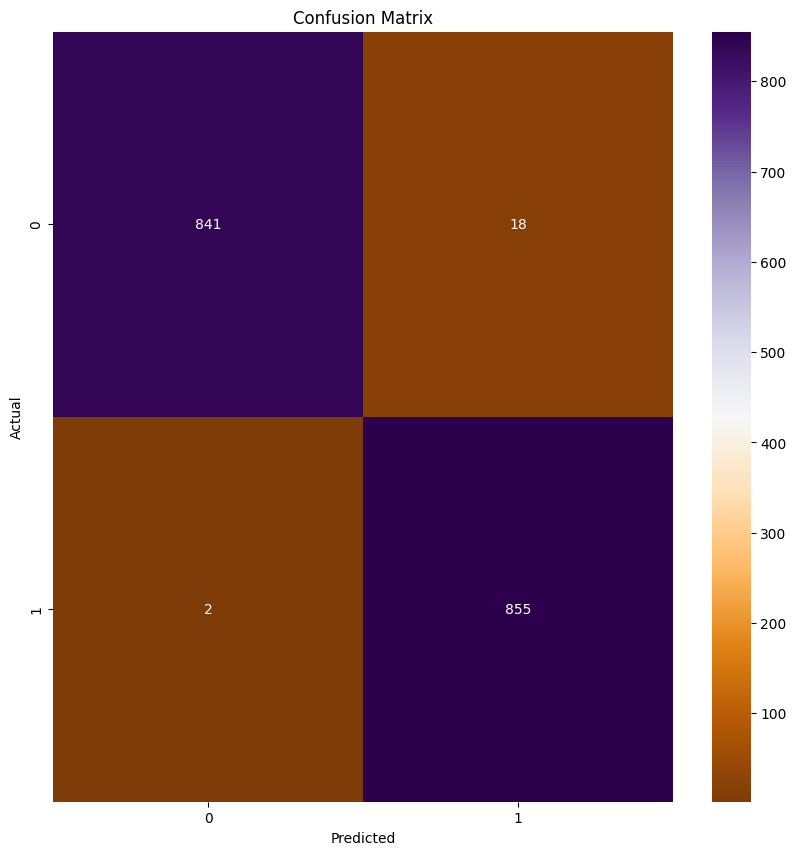

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='PuOr') #use PuOr for purple and black
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')